In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
from scipy.io import loadmat
from filter_utils import filter_dataframe, filter_exercise
import os

In [2]:
db1_path = './utils/ninaproDB1'
db2_path = './utils/ninaproDB2'

db1_bottle_key = 'E2'
db2_bottle_key = 'E2_A1'
files = os.listdir(db2_path)
usefull_files = [file for file in files if db1_bottle_key in file]

In [ ]:
# --- Data Aggregation and Processing ---
# This block iterates through a list of pre-selected MATLAB data files. For each file,
# it loads the data, applies a custom filter to extract relevant experimental
# conditions, and then aggregates the results into a single, unified pandas DataFrame.

# Initialize an empty list to temporarily store the processed DataFrames from each file.
# This is more memory-efficient than repeatedly appending to a growing DataFrame.
total_df = []

# Iterate over each of the selected MATLAB file names.
for file in usefull_files:
    # Construct the full file path and load the .mat file into a dictionary.
    data = loadmat(f"{db2_path}/{file}")

    # Apply a custom filtering function to the raw data.
    # The list [18, 19, 0] specifies the stimulus labels to be extracted,
    # corresponding to specific grasp types and a rest state.
    trimmed_df = filter_dataframe(data, [18, 19, 0])

    # Append the resulting cleaned and trimmed DataFrame to the list.
    total_df.append(trimmed_df)

# Concatenate the list of individual DataFrames into a single, comprehensive DataFrame.
# `ignore_index=True` is crucial for creating a new, continuous index for the final
# DataFrame, avoiding duplicate index values from the original files.
final_df = pd.concat(total_df, ignore_index=True)

218942
217744
214805
214130
217868
214941
218122
215245
218444
214377
214773
219195
213246
219874
218378
218505
214320
212802
219020
218315
220558
218813
218257
217308
218269
214434
214192


In [ ]:
final_df.to_csv("large_small_grasp.csv", index=False)

/tmp/ipykernel_7681/3099823704.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


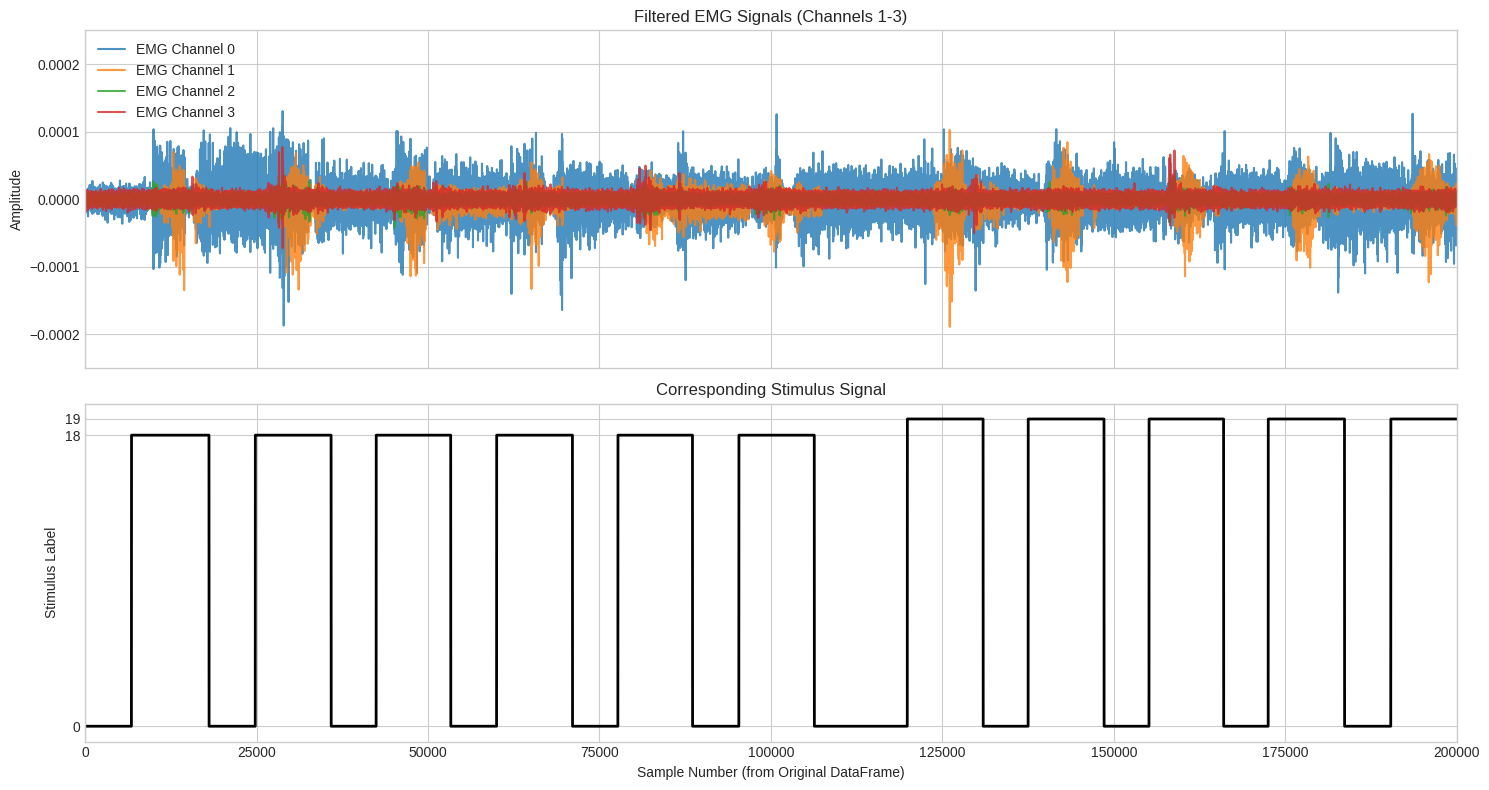

In [14]:
# Set up the plot with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
plt.style.use('seaborn-v0_8-whitegrid')

# --- Top Plot: EMG Signals ---
ax1.set_title('Filtered EMG Signals (Channels 1-3)')
ax1.set_ylabel('Amplitude')

# Plot each EMG channel from the filtered data
ax1.plot(final_df.index, final_df[0], label='EMG Channel 0', alpha=0.8)
ax1.plot(final_df.index, final_df[1], label='EMG Channel 1', alpha=0.8)
ax1.plot(final_df.index, final_df[2], label='EMG Channel 2', alpha=0.8)
ax1.plot(final_df.index, final_df[3], label='EMG Channel 3', alpha=0.8)
ax1.legend()
ax1.set_ylim(-0.00025,0.00025)
ax1.grid(True)


# --- Bottom Plot: Stimulus Signal ---
ax2.set_title('Corresponding Stimulus Signal')
ax2.set_ylabel('Stimulus Label')
ax2.set_xlabel('Sample Number (from Original DataFrame)')

# Plot the stimulus from the filtered data
ax2.plot(final_df.index, final_df['stimulus'], label='Stimulus', color='black', linewidth=2)

# Set y-axis ticks to only show the labels we care about
ax2.set_yticks([0, 18, 19])
ax2.grid(True)


# Show the plot
#plt.xlim(0,200000)
plt.tight_layout()
plt.show()